<a href="https://colab.research.google.com/github/duwiki-beep/MID-DUWIKI-WAHYUDI/blob/master/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

Data

In [12]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [13]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Visualize Example

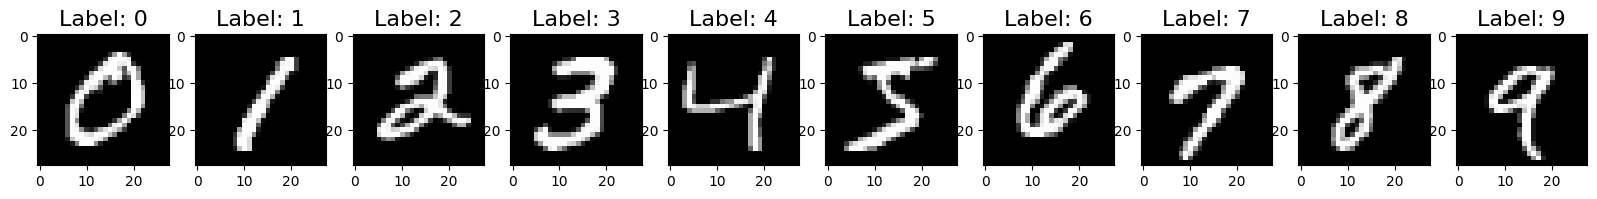

In [14]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [15]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [16]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [17]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Prepare Data

In [18]:
# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [19]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


Create Model - Fully Connected Neural Network

In [20]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


Train

In [21]:
batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 2s 12ms/step - loss: 0.5906 - accuracy: 0.8269
Epoch 2/10
118/118 [==============================] - 2s 13ms/step - loss: 0.2251 - accuracy: 0.9352
Epoch 3/10
118/118 [==============================] - 2s 15ms/step - loss: 0.1642 - accuracy: 0.9518
Epoch 4/10
118/118 [==============================] - 1s 11ms/step - loss: 0.1311 - accuracy: 0.9611
Epoch 5/10
118/118 [==============================] - 1s 11ms/step - loss: 0.1075 - accuracy: 0.9679
Epoch 6/10
118/118 [==============================] - 1s 13ms/step - loss: 0.0909 - accuracy: 0.9734
Epoch 7/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0773 - accuracy: 0.9764
Epoch 8/10
118/118 [==============================] - 2s 14ms/step - loss: 0.0675 - accuracy: 0.9792
Epoch 9/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0587 - accuracy: 0.9825
Epoch 10/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0509 - accura

Evaluate

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0705 - accuracy: 0.9778
Test Loss: 0.07045752555131912, Test Accuracy: 0.9778000116348267


In [23]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 0s 1ms/step
[[5.7780977e-07 9.2094791e-07 3.2678101e-06 ... 9.9988753e-01
  8.2062718e-07 2.6353764e-05]
 [2.4804419e-07 1.4283252e-05 9.9996728e-01 ... 1.5421019e-09
  7.3218831e-07 3.4866579e-10]
 [6.4830133e-06 9.9895447e-01 8.8107066e-05 ... 6.4319797e-04
  6.5841858e-05 1.0005938e-05]
 ...
 [2.5587474e-10 4.0229843e-08 2.5309315e-09 ... 8.0825806e-08
  3.3391893e-07 3.4599805e-05]
 [3.1197393e-07 4.8187632e-09 1.3019931e-10 ... 1.4170743e-09
  1.5397565e-05 2.3602437e-08]
 [1.2839344e-08 2.0782456e-10 1.7999144e-09 ... 3.6144433e-13
  2.1399629e-10 4.7051984e-11]]
[7 2 1 ... 4 5 6]


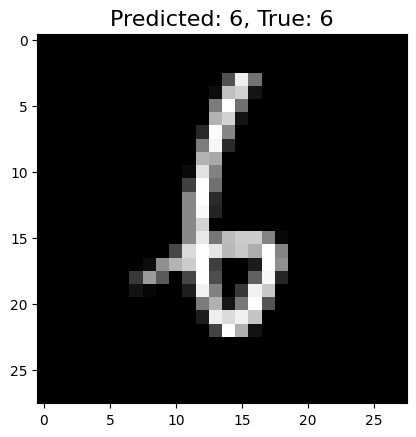

In [24]:
# Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

Confusion Matrix

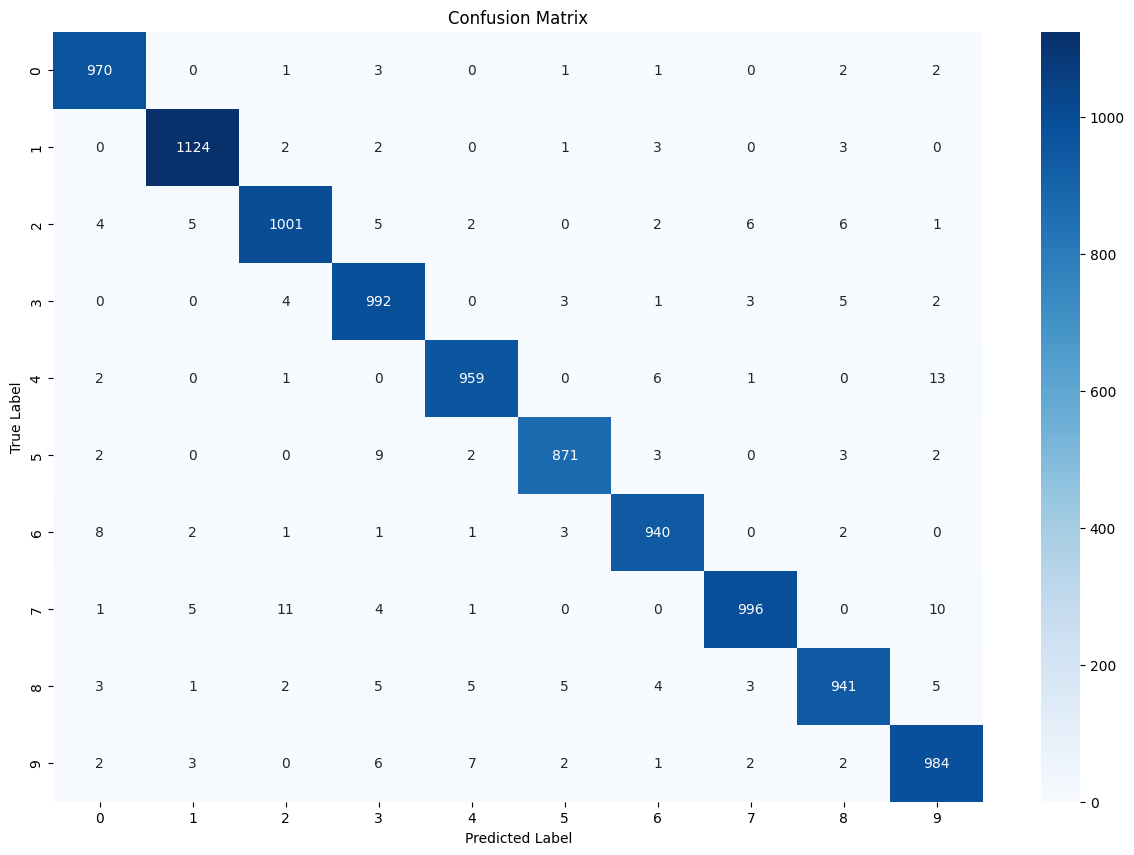

In [25]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

Investigate Some Errors

In [26]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [27]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

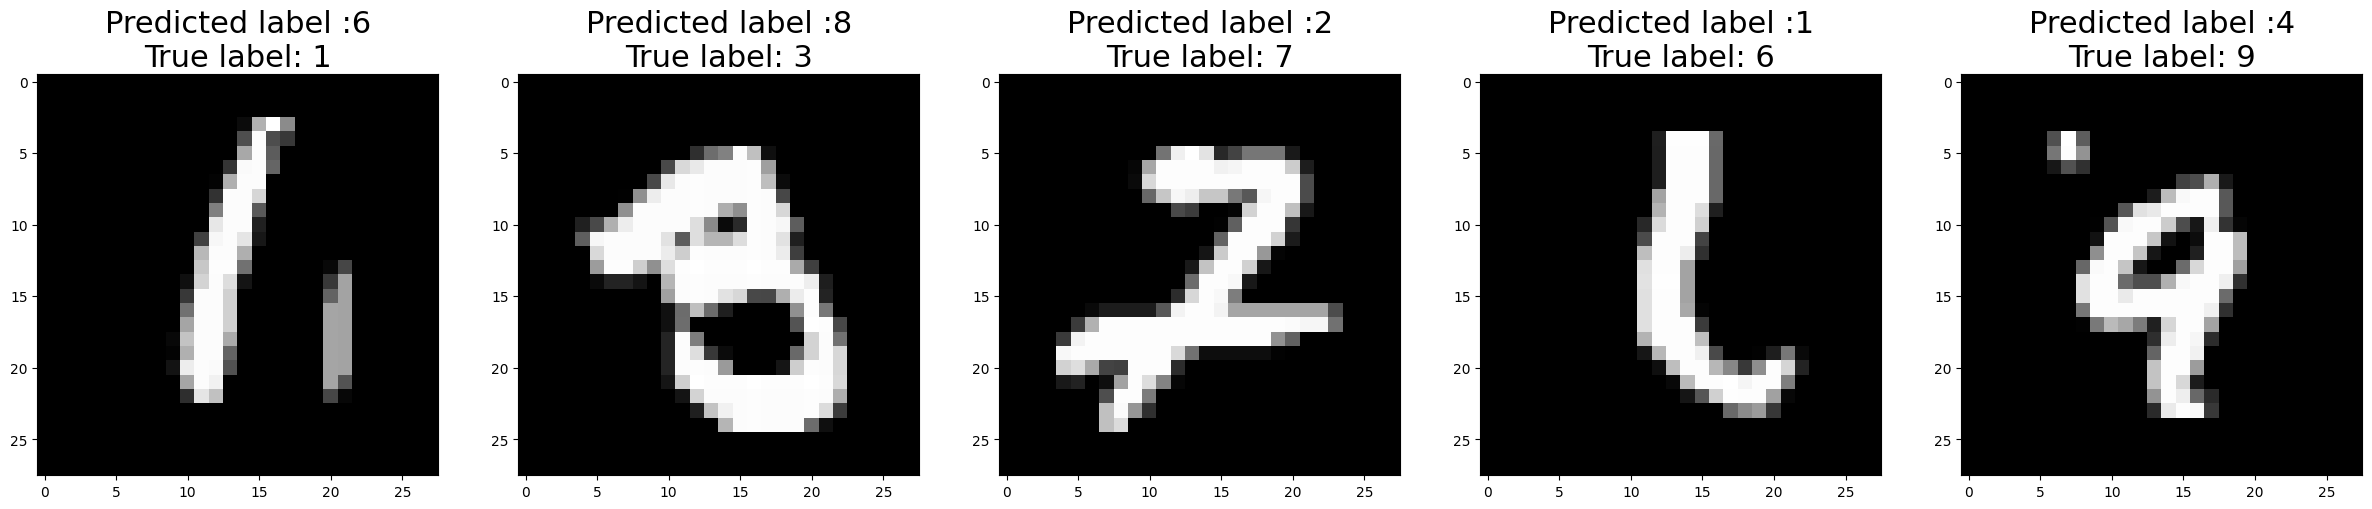

In [28]:
# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)